# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju

- Nama: Fathur Rahman Al Farizy
- Email: fathur.alfarizy02@gmail.com
- Id Dicoding: fralfrzy

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

### Menyiapkan data yang akan diguankan

In [2]:
employee = pd.read_csv("employee_data.csv")
employee.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


## Data Understanding

### Fitur-fitur dalam dataset `employee`

- **EmployeeId:** Pengenal unik untuk setiap karyawan.
- **Attrition:** Indikator apakah karyawan keluar dari perusahaan (0=tidak, 1=ya).
- **Age:** Usia karyawan.
- **BusinessTravel:** Komitmen perjalanan untuk pekerjaan.
- **DailyRate:** Gaji harian.
- **Department:** Departemen karyawan.
- **DistanceFromHome:** Jarak dari tempat kerja ke rumah (dalam km).
- **Education:** Tingkat pendidikan karyawan (1-Di Bawah Sekolah Tinggi, 2-Sekolah Tinggi, 3-Sarjana, 4-Magister, 5-Doktor).
- **EducationField:** Bidang pendidikan karyawan.
- **EnvironmentSatisfaction:** Tingkat kepuasan terhadap lingkungan kerja (1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi).
- **Gender:** Jenis kelamin karyawan.
- **HourlyRate:** Gaji per jam.
- **JobInvolvement:** Tingkat keterlibatan dalam pekerjaan (1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi).
- **JobLevel:** Tingkatan pekerjaan (1 hingga 5).
- **JobRole:** Peran pekerjaan karyawan.
- **JobSatisfaction:** Tingkat kepuasan terhadap pekerjaan (1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi).
- **MaritalStatus:** Status pernikahan karyawan.
- **MonthlyIncome:** Gaji bulanan.
- **MonthlyRate:** Tarif bulanan.
- **NumCompaniesWorked:** Jumlah perusahaan tempat karyawan pernah bekerja.
- **Over18:** Indikator apakah karyawan berusia di atas 18 tahun.
- **OverTime:** Indikator apakah karyawan bekerja lembur.
- **PercentSalaryHike:** Persentase kenaikan gaji tahun lalu.
- **PerformanceRating:** Tingkat kinerja (1-Rendah, 2-Baik, 3-Sangat Baik, 4-Luar Biasa).
- **RelationshipSatisfaction:** Tingkat kepuasan terhadap hubungan kerja (1-Rendah, 2-Sedang, 3-Tinggi, 4-Sangat Tinggi).
- **StandardHours:** Jam kerja standar.
- **StockOptionLevel:** Tingkat opsi saham.
- **TotalWorkingYears:** Total tahun bekerja.
- **TrainingTimesLastYear:** Jumlah pelatihan yang diikuti tahun lalu.
- **WorkLifeBalance:** Tingkat keseimbangan kehidupan kerja (1-Rendah, 2-Baik, 3-Sangat Baik, 4-Luar Biasa).
- **YearsAtCompany:** Jumlah tahun bekerja di perusahaan saat ini.
- **YearsInCurrentRole:** Jumlah tahun dalam peran saat ini.
- **YearsSinceLastPromotion:** Jumlah tahun sejak promosi terakhir.
- **YearsWithCurrManager:** Jumlah tahun bekerja dengan manajer saat ini.

### Dimensi data

In [3]:
# Memeriksa Dimensi DataFrame
print(f"\nJumlah baris: {employee.shape[0]}")
print(f"Jumlah kolom: {employee.shape[1]}")


Jumlah baris: 1470
Jumlah kolom: 35


### Tipe data

In [4]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Berdasarkan informasi di atas terdapat beberapa kolom dengan berbagai tipe data (dtypes) di antaranya:
- float64 (1 kolom): Kolom 'Attrition' memiliki tipe data float.
- int64 (26 kolom): Sebagian besar kolom (EmployeeId, Age, DailyRate, dll.) bertipe integer.
- object (8 kolom): Kolom-kolom seperti BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, dan OverTime bertipe object, yang biasanya berarti berisi string (teks).

### Analisis Nilai Unik
Memeriksa jumlah nilai unik per kolom untuk mendapat wawasan tentang variasi data dan mengidentifikasi kolom konstanta.

In [5]:
unique_values_count = employee.nunique().sort_values()
print("Jumlah nilai unik per kolom:")
print(unique_values_count)

# Identifikasi kolom dengan hanya 1 nilai unik (kolom konstanta)
constant_columns = unique_values_count[unique_values_count == 1].index.tolist()
if constant_columns:
    print(f"\nKolom dengan hanya 1 nilai unik (konstanta): {constant_columns}")
else:
    print("\nTidak ada kolom dengan hanya 1 nilai unik.")

Jumlah nilai unik per kolom:
EmployeeCount                  1
Over18                         1
StandardHours                  1
Attrition                      2
OverTime                       2
PerformanceRating              2
Gender                         2
BusinessTravel                 3
Department                     3
MaritalStatus                  3
RelationshipSatisfaction       4
StockOptionLevel               4
JobSatisfaction                4
EnvironmentSatisfaction        4
JobInvolvement                 4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age           

Dari output di atas, kolom 'EmployeeCount', 'Over18', dan 'StandardHours' hanya memiliki satu nilai unik. Kolom-kolom ini tidak memberikan informasi variatif untuk analisis dan pemodelan, sehingga dapat dipertimbangkan untuk dihapus. Untuk saat ini, kita akan membiarkannya, namun ini adalah catatan penting untuk tahap Feature Engineering.  

**Catatan:** Kolom 'EmployeeId' memiliki nilai unik sebanyak jumlah baris, yang memang diharapkan untuk sebuah ID.

### Analisis Univariat
Analisis univariat bertujuan untuk memahami distribusi dan karakteristik masing-masing variabel.

#### 1. Analisis Variabel Target (Attrition)

Jumlah Attrition:
Attrition
0.0    879
1.0    179
Name: count, dtype: int64

Persentase Attrition:
Attrition
0.0    83.081285
1.0    16.918715
Name: proportion, dtype: float64


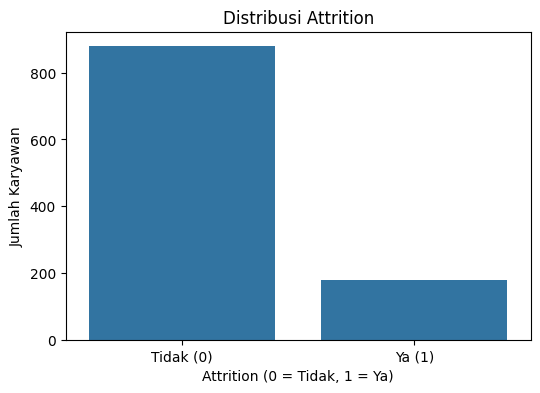

In [6]:
# Distribusi variabel target 'Attrition'
attrition_counts = employee['Attrition'].value_counts()
attrition_percentage = employee['Attrition'].value_counts(normalize=True) * 100

print("Jumlah Attrition:")
print(attrition_counts)
print("\nPersentase Attrition:")
print(attrition_percentage)

plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=employee)
plt.title('Distribusi Attrition')
plt.xlabel('Attrition (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Karyawan')
plt.xticks([0, 1], ['Tidak (0)', 'Ya (1)'])
plt.show()

Dari distribusi variabel target, terlihat adanya ketidakseimbangan kelas (class imbalance), dimana jumlah karyawan yang tidak attrition (0) jauh lebih banyak daripada yang attrition (1). Hal ini perlu diperhatikan saat tahap pemodelan karena dapat mempengaruhi kinerja model."

#### 2. Analisis Variabel Numerik

Untuk variabel numerik, kita akan melihat ringkasan statistik dan distribusinya menggunakan histogram dan boxplot.

Ringkasan Statistik Variabel Numerik:
                           count          mean          std     min      25%  \
EmployeeId                1470.0    735.500000   424.496761     1.0   368.25   
Age                       1470.0     36.923810     9.135373    18.0    30.00   
Attrition                 1058.0      0.169187     0.375094     0.0     0.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
Jo

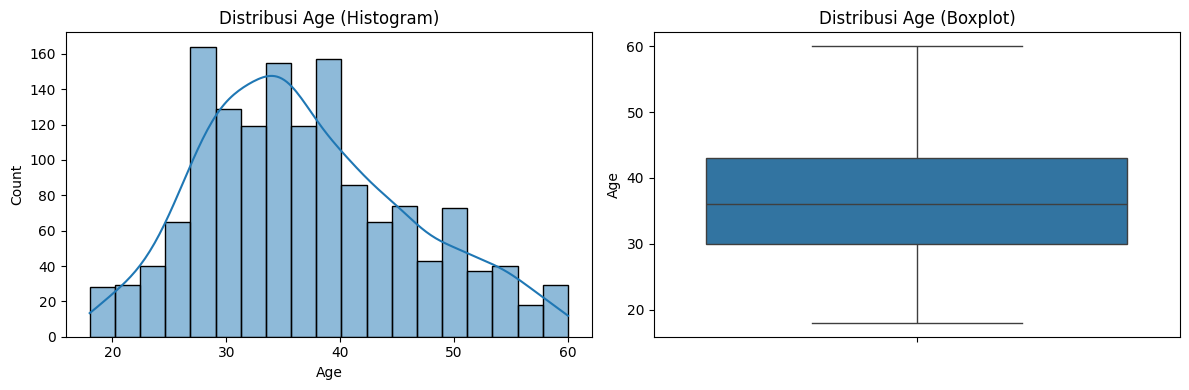

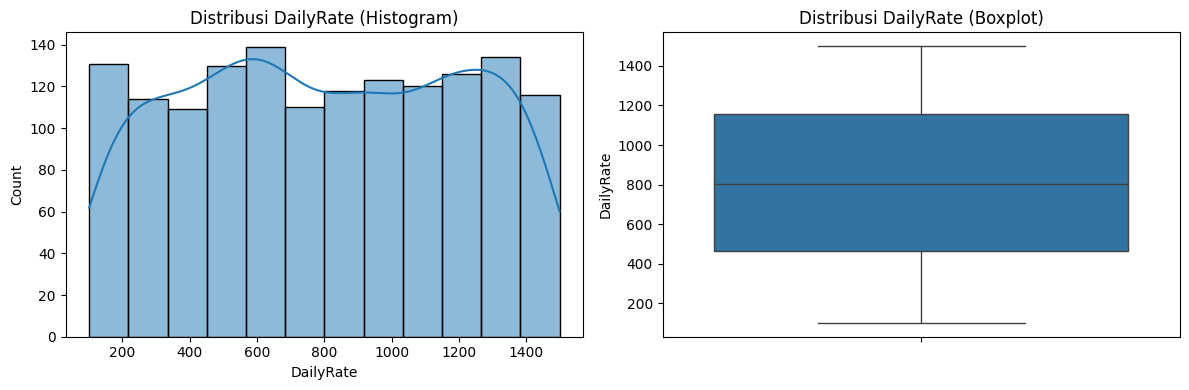

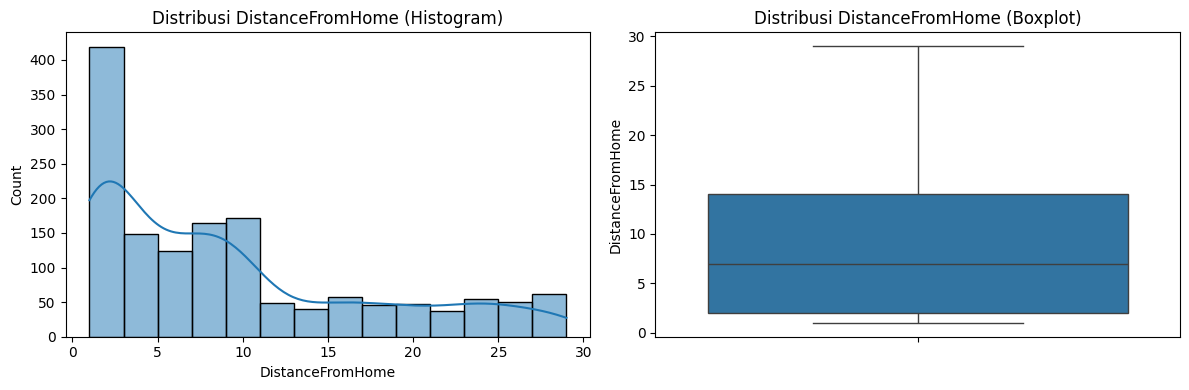

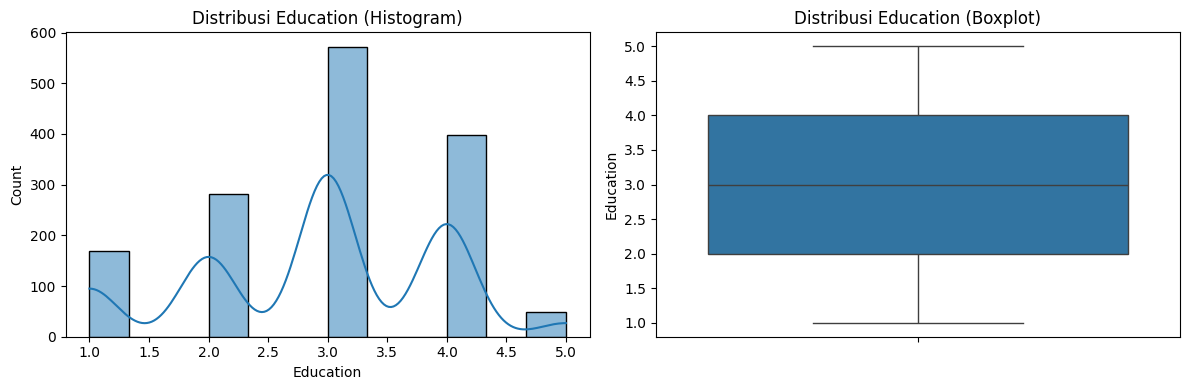

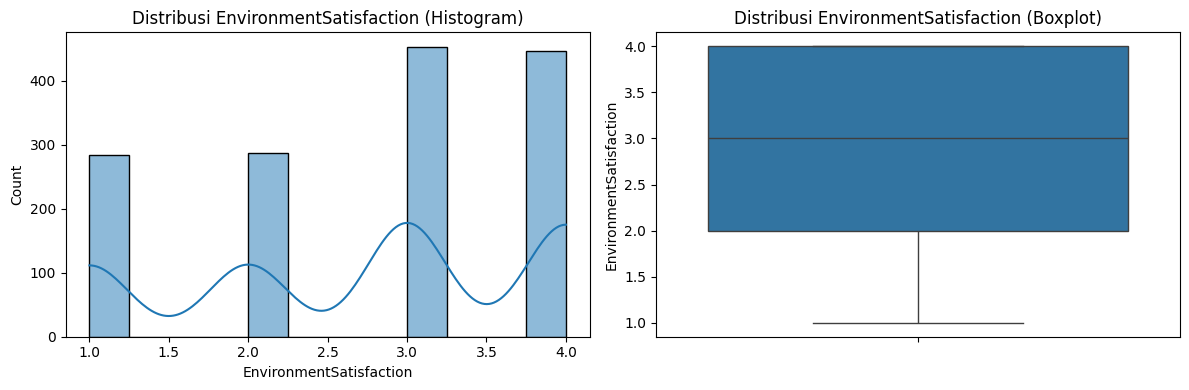

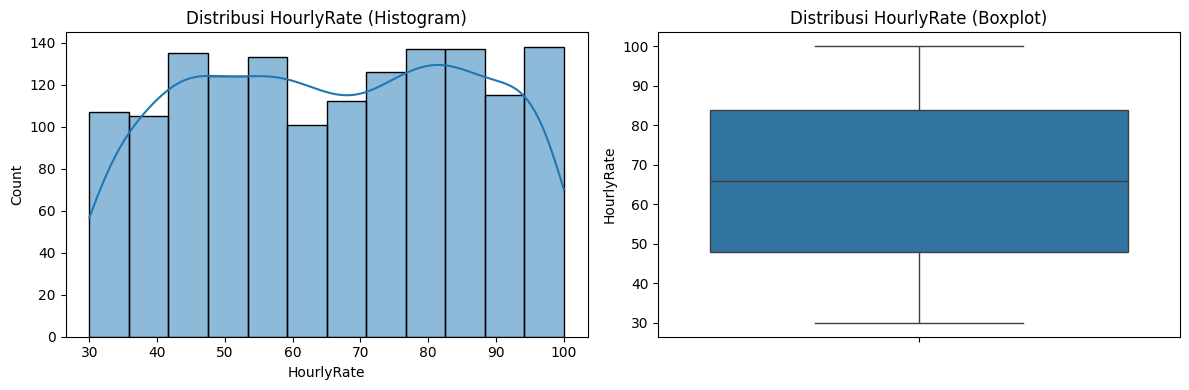

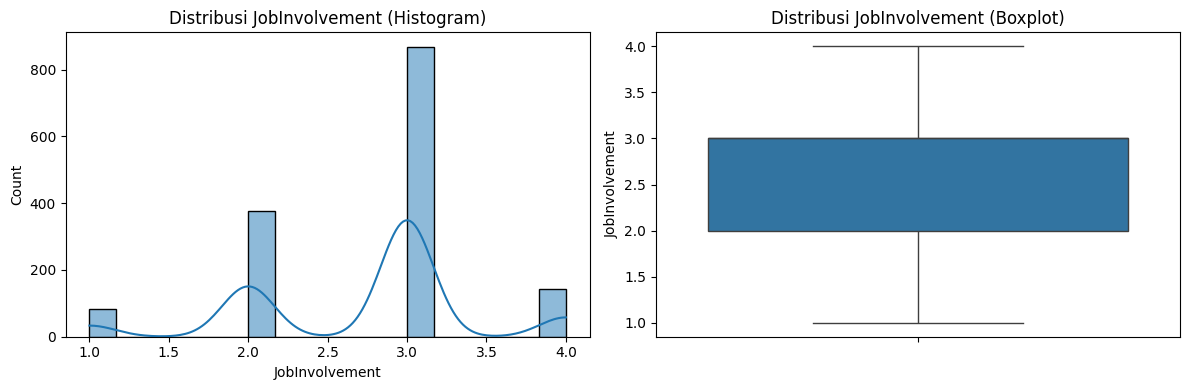

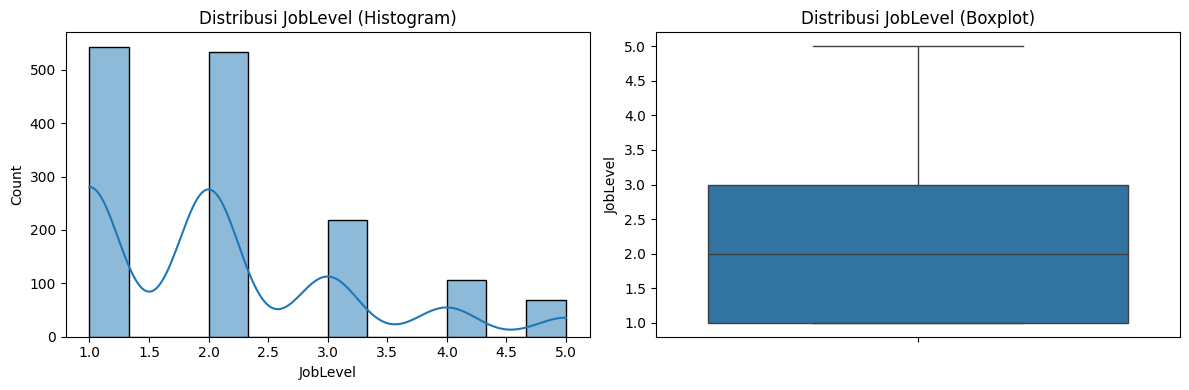

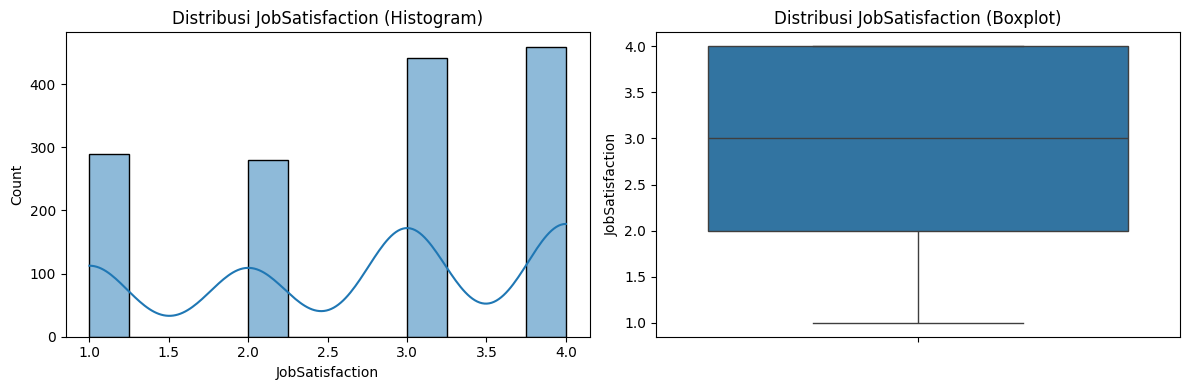

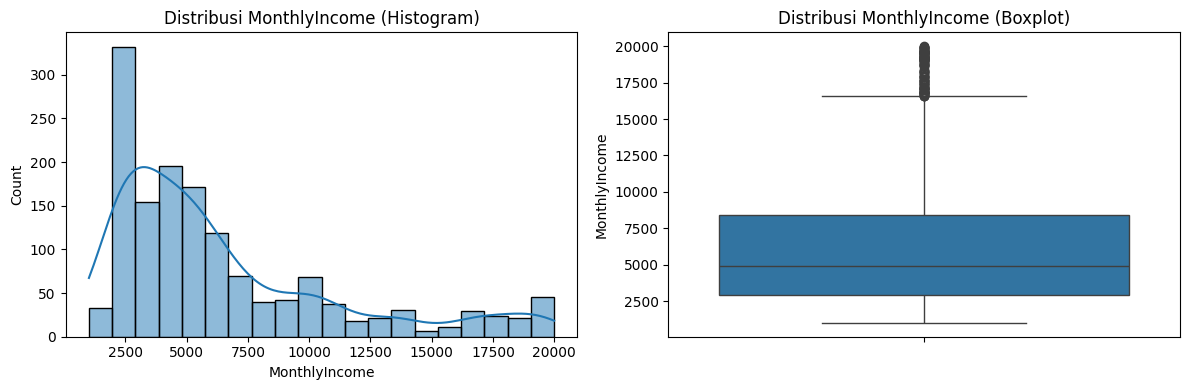

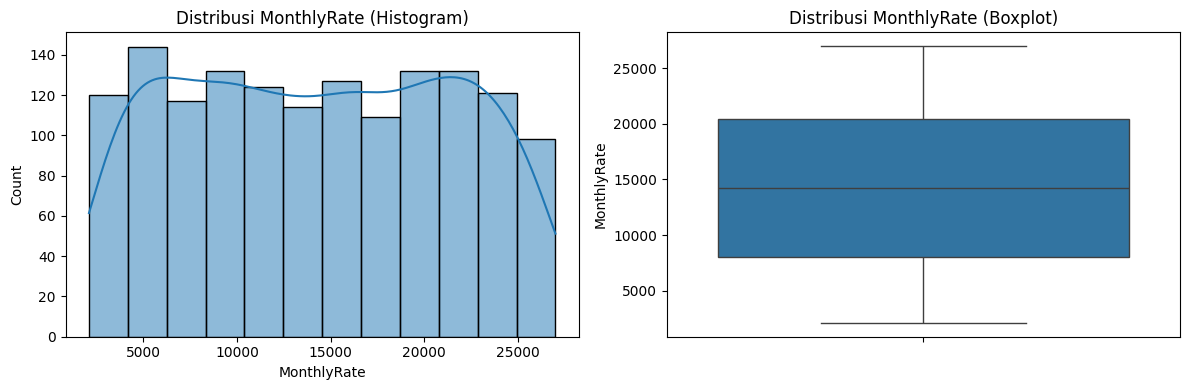

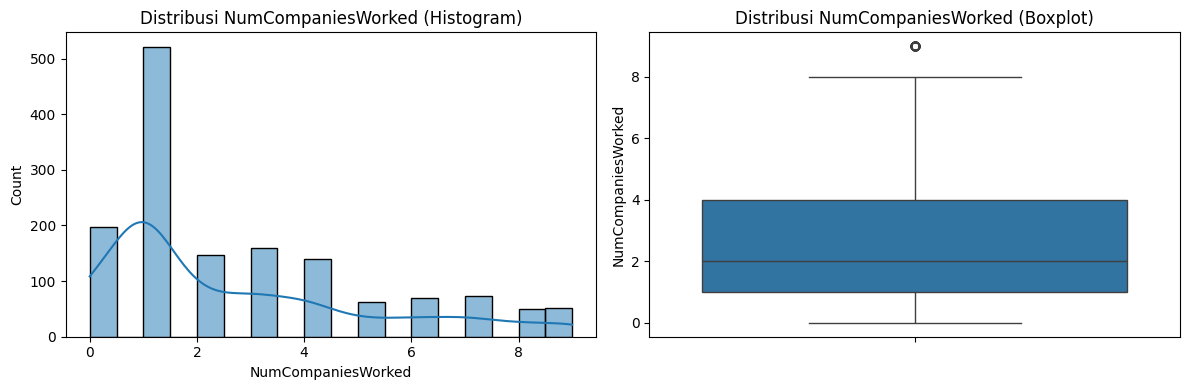

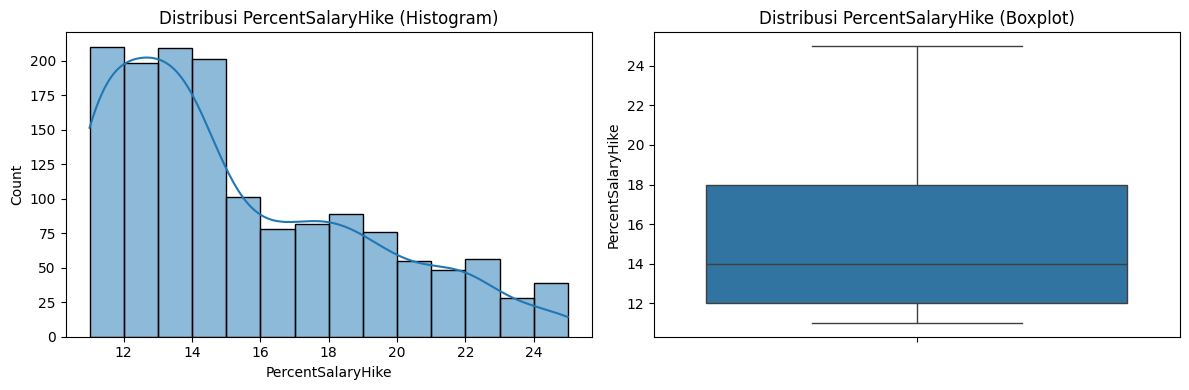

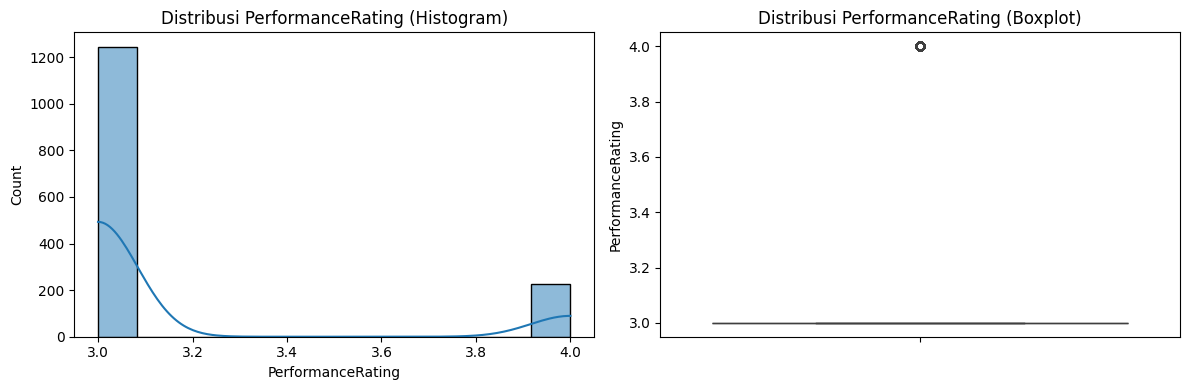

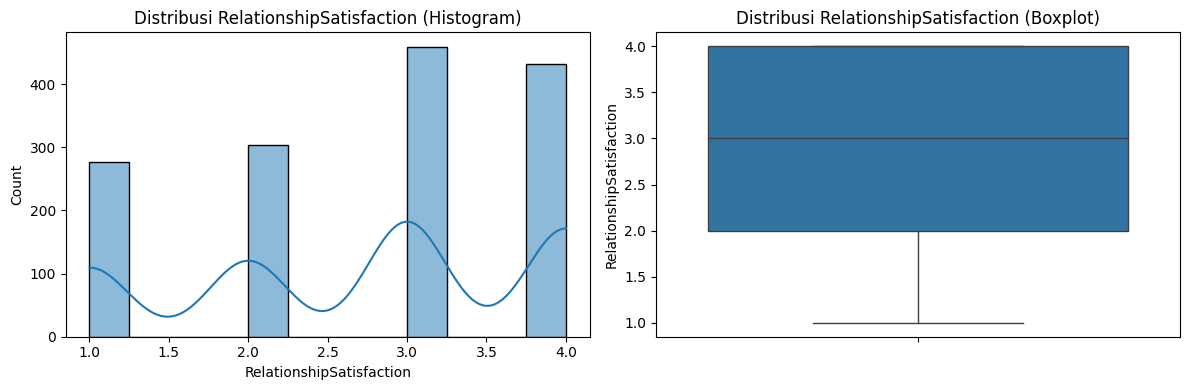

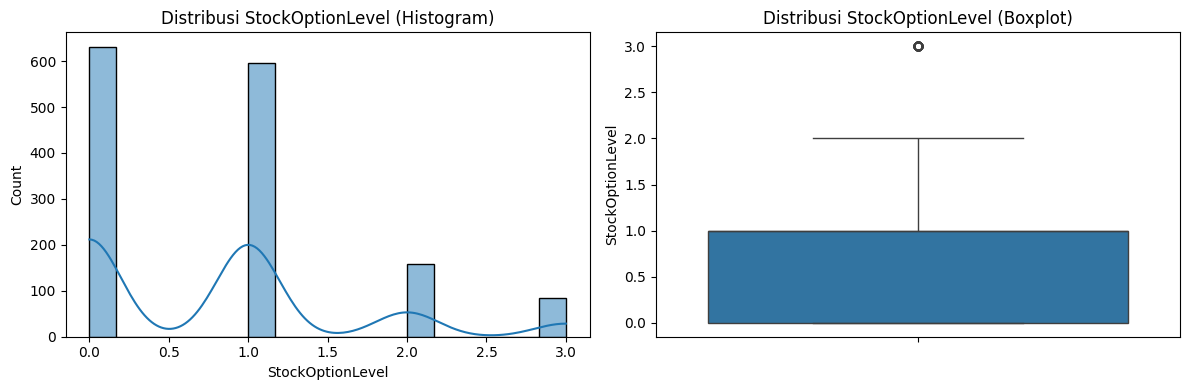

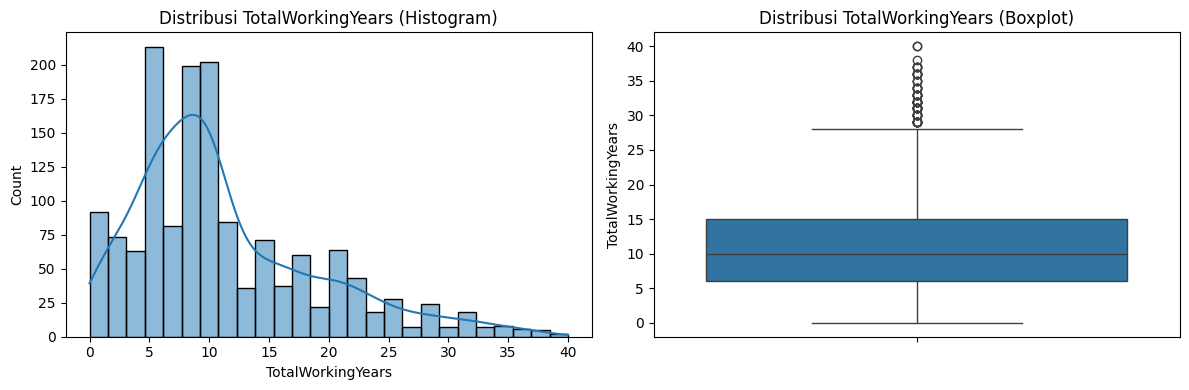

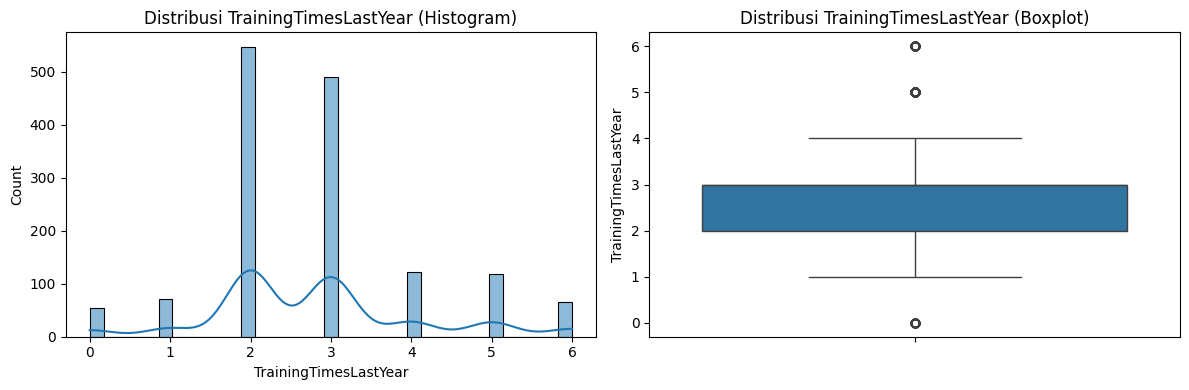

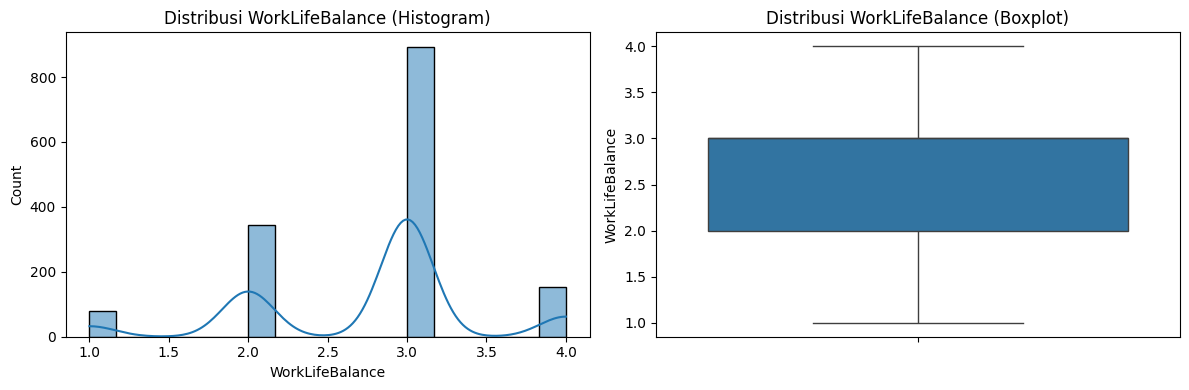

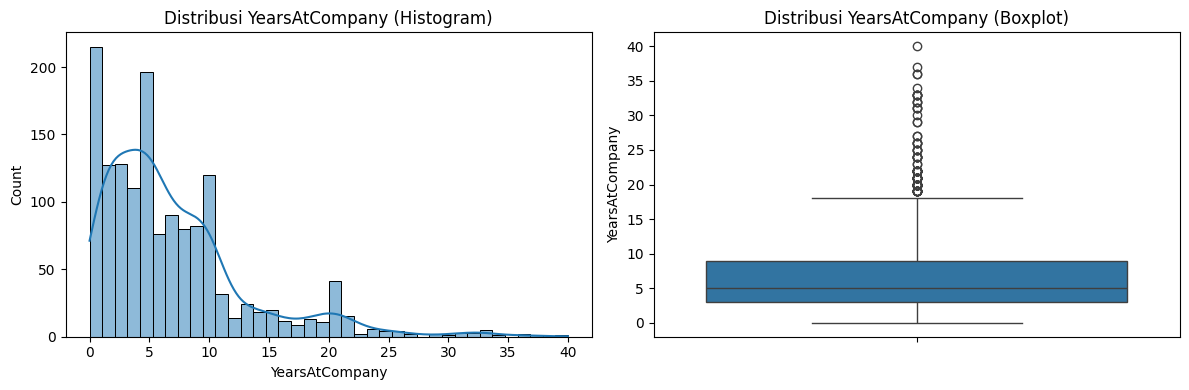

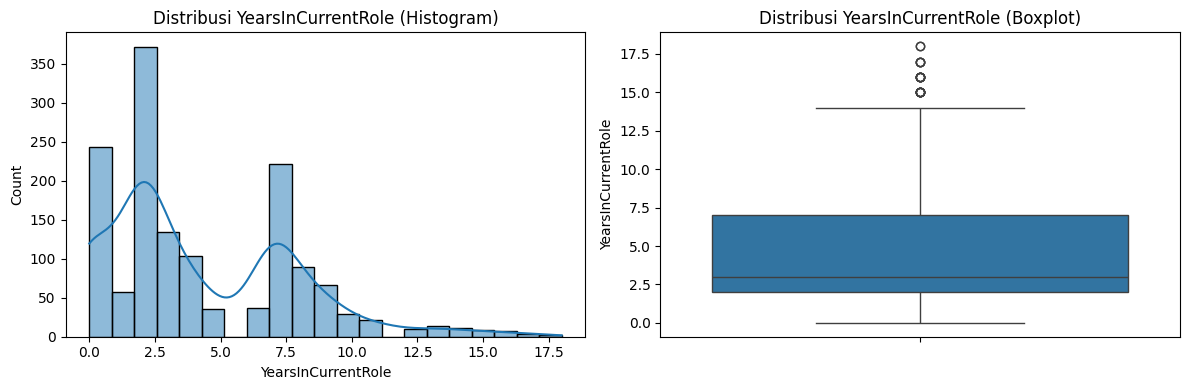

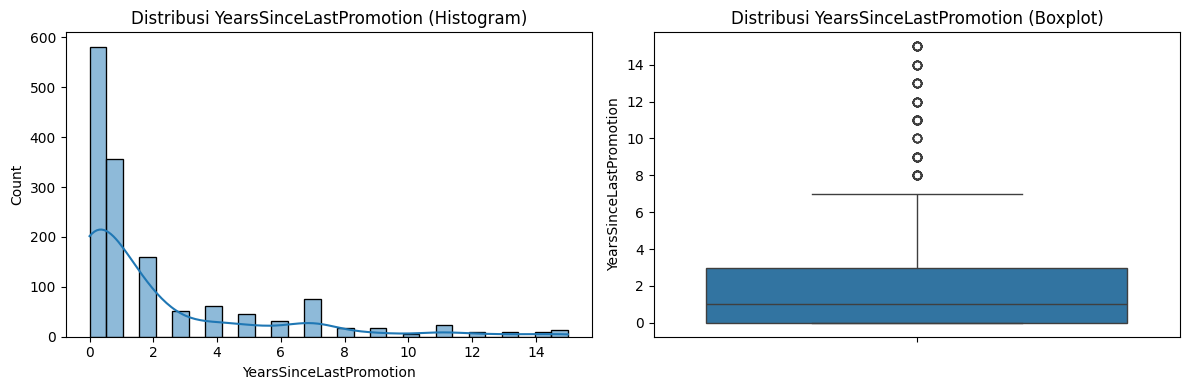

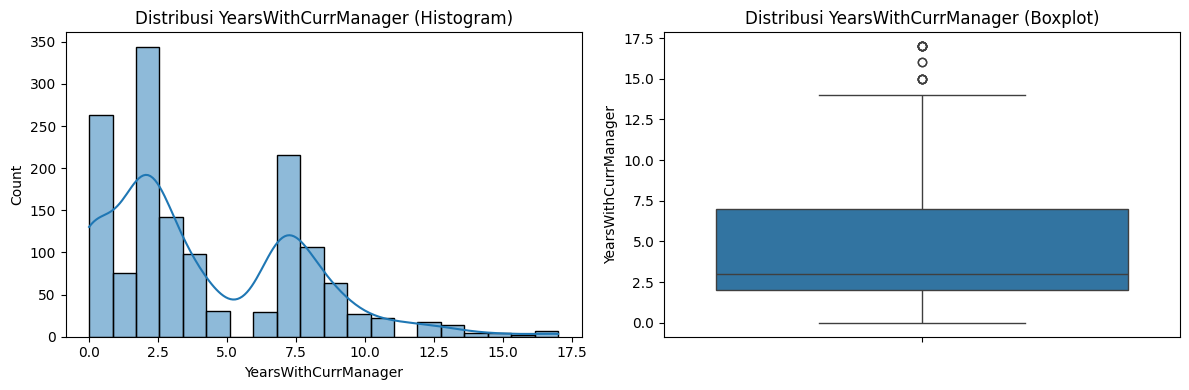

In [7]:
# Ringkasan statistik untuk variabel numerik
print("Ringkasan Statistik Variabel Numerik:")
num_cols = employee.select_dtypes(exclude='object').columns
print(employee[num_cols].describe().T)

# Visualisasi distribusi variabel numerik
for col in num_cols:
    if col not in ['EmployeeId', 'Attrition', 'EmployeeCount', 'StandardHours']: # Hindari plot untuk ID, target, dan konstanta
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        sns.histplot(employee[col], kde=True)
        plt.title(f'Distribusi {col} (Histogram)')

        plt.subplot(1, 2, 2)
        sns.boxplot(y=employee[col])
        plt.title(f'Distribusi {col} (Boxplot)')

        plt.tight_layout()
        plt.show()

Observasi dari analisis variabel numerik:
- **Age**: Distribusi usia karyawan terlihat normal dengan sedikit kemiringan ke kanan. Mayoritas karyawan berusia antara 30-40 tahun. Tidak terlihat outlier yang ekstrem.
- **DailyRate, HourlyRate, MonthlyRate**: Variabel-variabel ini menunjukkan sebaran yang cukup luas.
- **DistanceFromHome**: Mayoritas karyawan tinggal relatif dekat dengan kantor, namun ada beberapa yang jaraknya cukup jauh. Distribusinya miring ke kanan.
- **Education**: Tingkat pendidikan karyawan mayoritas sampai sarjana.
- **EnvironmentSatisfaction**: Sebagian besar karyawan merasa puas dengan lingkungan kerjanya.
- **JobInvolvement**: Mayoritas karyawan tingkat keterlibatan kerjanya tinggi.
- **JobLevel**:  Tingkatan pekerjaan karyawan sebagian besar berada di level 1 lalu perlahan semakin sedikit ke level 5. Distribusinya miring ke kanan.
- **JobSatisfaction**: Tingkat kepuasan terhadap pekerjaan oleh karyawan rata-rata menunjukkan angka 3 yang berarti cukup tinggi.
- **MonthlyIncome**: Distribusinya sangat miring ke kanan, menunjukkan bahwa sebagian kecil karyawan memiliki pendapatan bulanan yang jauh lebih tinggi. Ada potensi outlier di sisi atas.
- **NumCompaniesWorked**: Distribusi miring ke kanan. Mayoritas karyawan pernah bekerja di 1–3 perusahaan sebelumnya. Terlihat ada beberapa outlier di sisi atas (misalnya, 9 perusahaan).
- **PercentSalaryHike**:  Mayoritas kenaikan gaji berada di kisaran 11–15%, dengan puncak di sekitar 13%. Distribusi sedikit miring ke kanan, menunjukkan ada beberapa karyawan yang mendapat kenaikan signifikan hingga 25%.
- **PerformanceRating**: Distribusinya sangat tidak merata, didominasi oleh nilai 3 (baik), dengan sebagian kecil bernilai 4 (sangat baik). Hampir tidak ada variasi, sehingga kurang informatif untuk analisis prediktif.
- **RelationshipSatisfaction**:  Cenderung merata pada skala 1–4, namun terlihat bahwa mayoritas merasa cukup puas (skor 3 dan 4). Tidak ada outlier mencolok.
- **StockOptionLevel**: Distribusi sangat tidak merata dan condong ke level rendah (0 dan 1). Lebih dari setengah karyawan tidak menerima opsi saham sama sekali. Level 3 merupakan outlier karena hanya dimiliki oleh segelintir karyawan.
- **TrainingTimeLastYear**: Mayoritas karyawan mengikuti pelatihan 2–3 kali dalam setahun. Terlihat pola distribusi multimodal, dan ada outlier untuk nilai tinggi (misalnya 5 dan 6).
- **WorkLifeBalance**: Sebagian besar karyawan memberikan skor 3 (cukup seimbang), disusul oleh skor 2 dan 4. Distribusi relatif simetris dan tidak ada outlier yang mencolok.
- **PercentSalaryHike**: Kenaikan gaji mayoritas berada di rentang 10-15%.
- **TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager**: Semua variabel terkait pengalaman kerja ini distribusinya miring ke kanan, yang umum terjadi.

#### 3. Analisis Variabel Kategorikal

Untuk variabel kategorikal, kita akan melihat frekuensi masing-masing kategori.

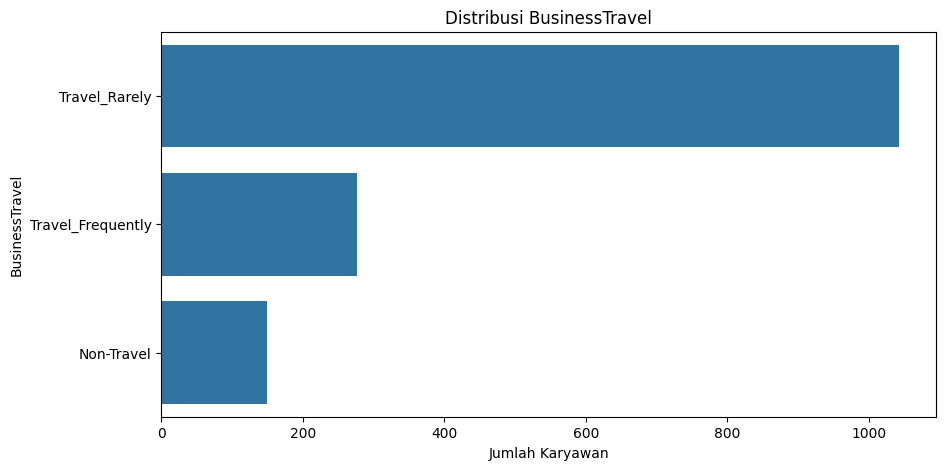

Proporsi untuk kolom BusinessTravel:
BusinessTravel
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: proportion, dtype: float64
--------------------------------------------------


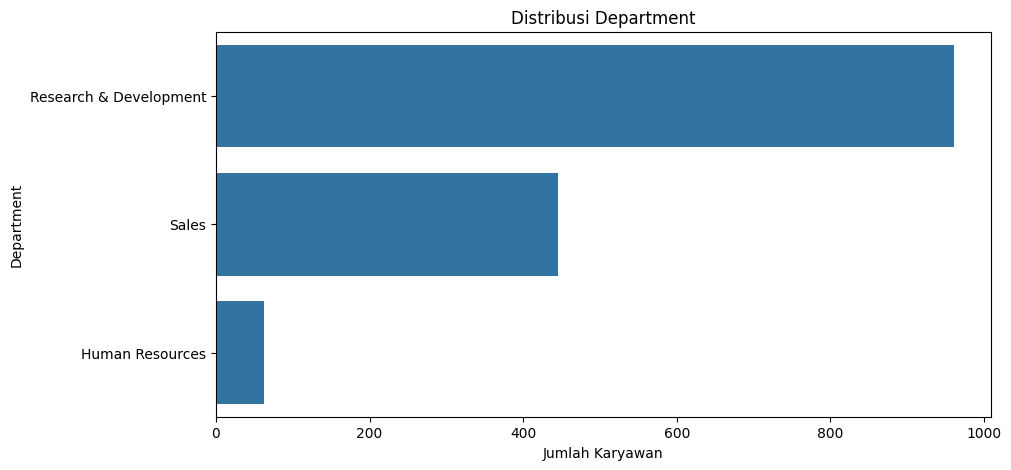

Proporsi untuk kolom Department:
Department
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: proportion, dtype: float64
--------------------------------------------------


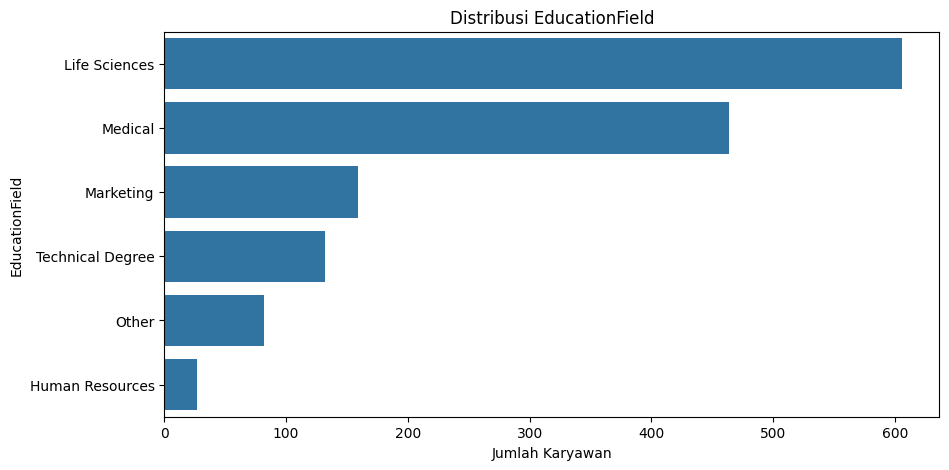

Proporsi untuk kolom EducationField:
EducationField
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: proportion, dtype: float64
--------------------------------------------------


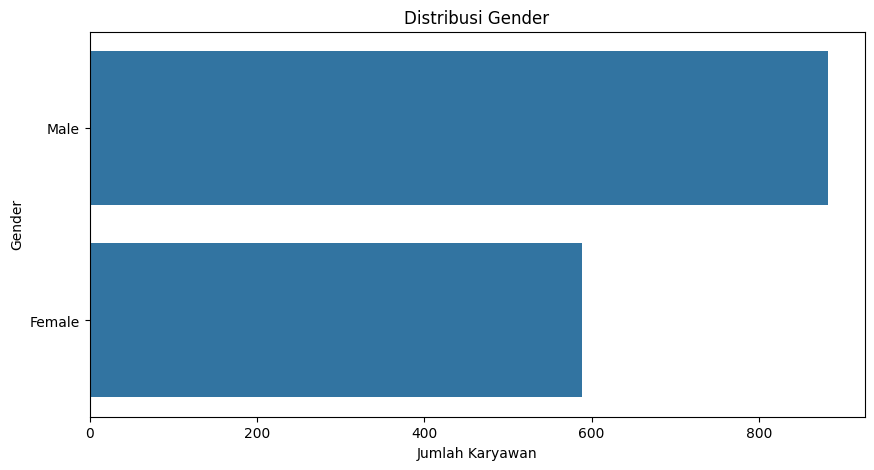

Proporsi untuk kolom Gender:
Gender
Male      60.0
Female    40.0
Name: proportion, dtype: float64
--------------------------------------------------


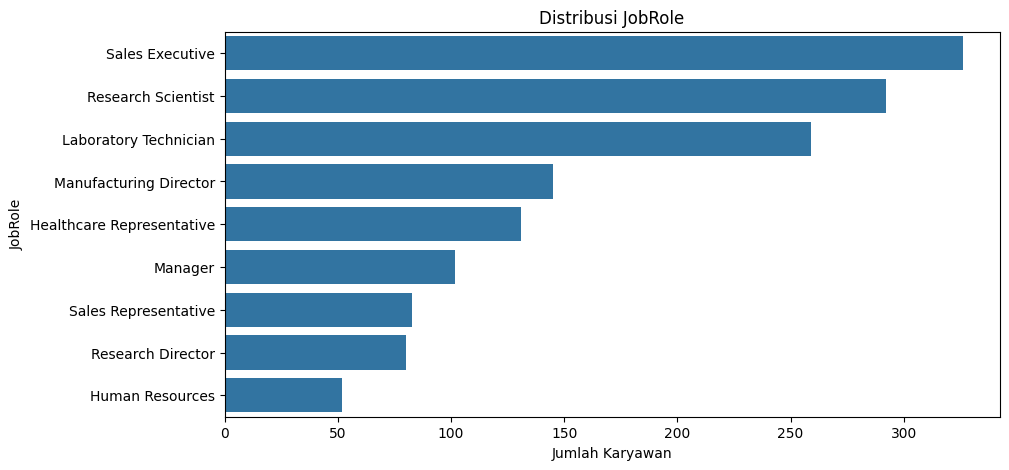

Proporsi untuk kolom JobRole:
JobRole
Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare Representative     8.911565
Manager                       6.938776
Sales Representative          5.646259
Research Director             5.442177
Human Resources               3.537415
Name: proportion, dtype: float64
--------------------------------------------------


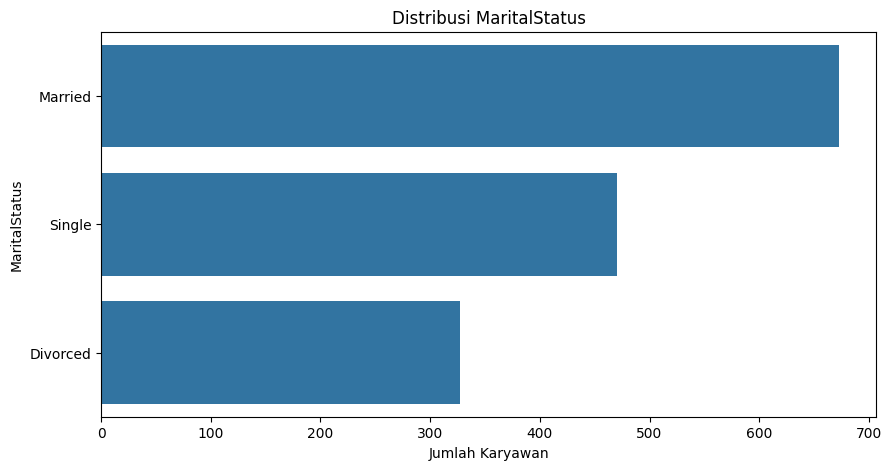

Proporsi untuk kolom MaritalStatus:
MaritalStatus
Married     45.782313
Single      31.972789
Divorced    22.244898
Name: proportion, dtype: float64
--------------------------------------------------


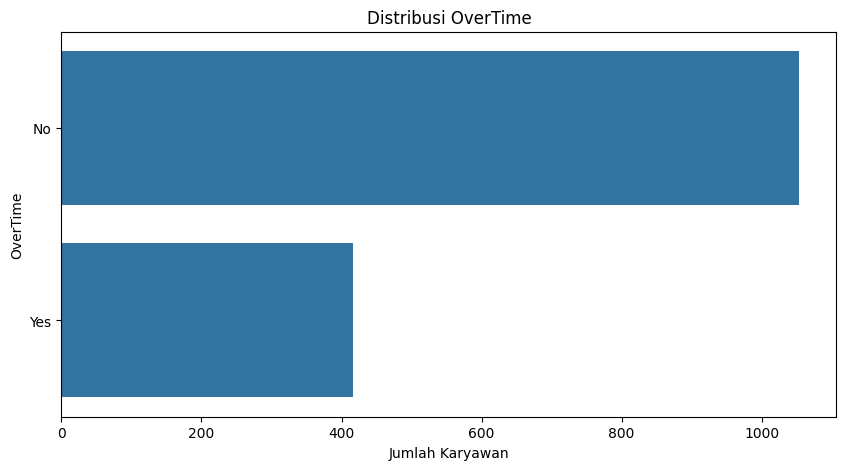

Proporsi untuk kolom OverTime:
OverTime
No     71.70068
Yes    28.29932
Name: proportion, dtype: float64
--------------------------------------------------


In [8]:
cat_cols = employee.select_dtypes(include='object').columns

for col in cat_cols:
    if col not in ['Over18']: # Hindari plot untuk kolom konstanta
        plt.figure(figsize=(10, 5))
        sns.countplot(y=col, data=employee, order = employee[col].value_counts().index)
        plt.title(f'Distribusi {col}')
        plt.xlabel('Jumlah Karyawan')
        plt.ylabel(col)
        plt.show()

        print(f"Proporsi untuk kolom {col}:")
        print(employee[col].value_counts(normalize=True) * 100)
        print("-" * 50)

Observasi dari analisis variabel kategorikal:
- **BusinessTravel**: Mayoritas karyawan 'Travel_Rarely'.
- **Department**: Departemen 'Research & Development' memiliki jumlah karyawan terbanyak, diikuti oleh 'Sales'.
- **EducationField**: Bidang pendidikan 'Life Sciences' dan 'Medical' mendominasi.
- **Gender**: Distribusi gender cukup seimbang.
- **JobRole**: Terdapat variasi peran pekerjaan, dengan 'Sales Executive' dan 'Research Scientist' sebagai yang paling umum.
- **MaritalStatus**: Mayoritas karyawan berstatus 'Married'.
- **OverTime**: Lebih banyak karyawan yang tidak bekerja lembur ('No') dibandingkan yang iya ('Yes').

### Analisis Bivariat (Hubungan dengan Attrition)
Analisis bivariat membantu memahami hubungan antara dua variabel. Kita akan fokus pada hubungan beberapa fitur dengan `Attrition`.

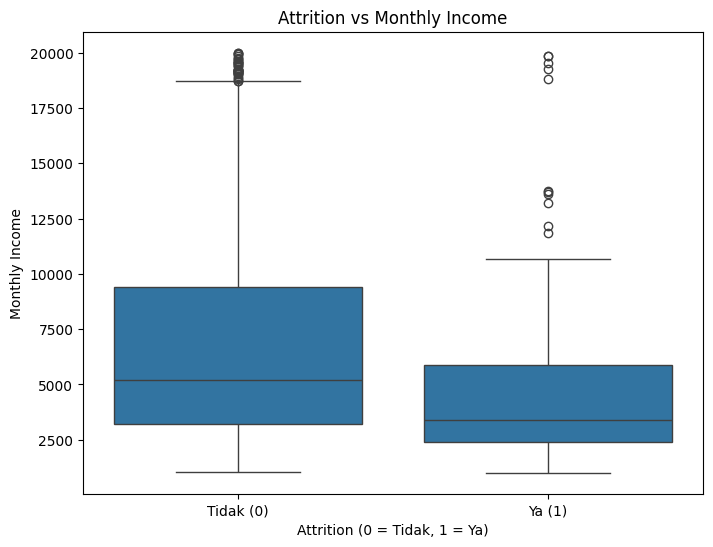

In [9]:
# Attrition vs MonthlyIncome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=employee)
plt.title('Attrition vs Monthly Income')
plt.xlabel('Attrition (0 = Tidak, 1 = Ya)')
plt.xticks([0, 1], ['Tidak (0)', 'Ya (1)'])
plt.ylabel('Monthly Income')
plt.show()

Terlihat bahwa karyawan dengan 'MonthlyIncome' yang lebih rendah cenderung memiliki tingkat attrition yang lebih tinggi.

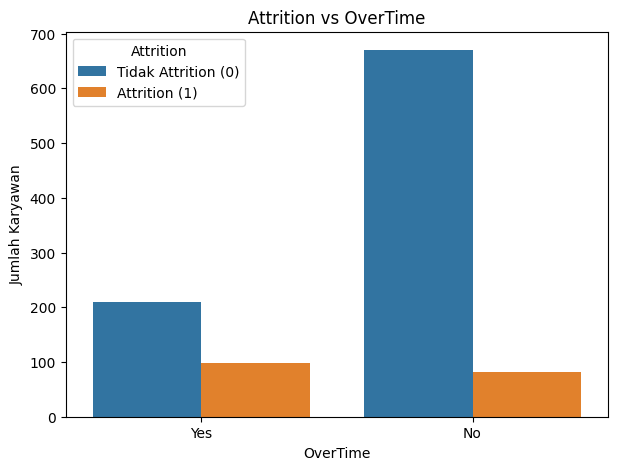

In [10]:
# Attrition vs OverTime
plt.figure(figsize=(7, 5))
sns.countplot(x='OverTime', hue='Attrition', data=employee)
plt.title('Attrition vs OverTime')
plt.xlabel('OverTime')
plt.ylabel('Jumlah Karyawan')
legend_labels = ['Tidak Attrition (0)', 'Attrition (1)']
plt.legend(title='Attrition', labels=legend_labels)
plt.show()


Karyawan yang bekerja lembur ('Yes' pada OverTime) menunjukkan proporsi attrition yang lebih tinggi dibandingkan yang tidak lembur.

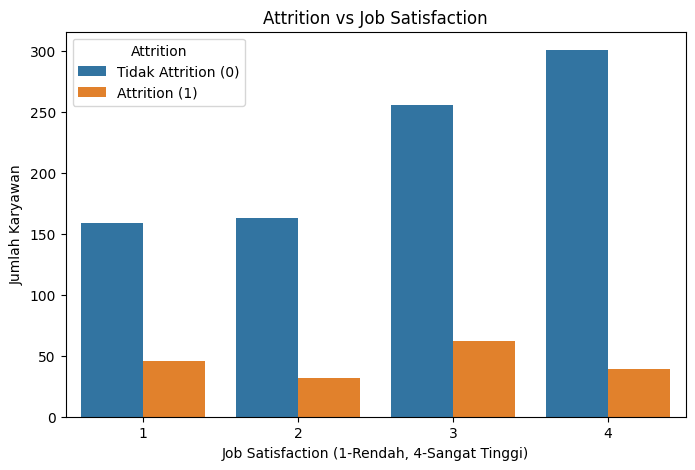

In [11]:
# Attrition vs JobSatisfaction
plt.figure(figsize=(8, 5))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=employee)
plt.title('Attrition vs Job Satisfaction')
plt.xlabel('Job Satisfaction (1-Rendah, 4-Sangat Tinggi)')
plt.ylabel('Jumlah Karyawan')
legend_labels = ['Tidak Attrition (0)', 'Attrition (1)']
plt.legend(title='Attrition', labels=legend_labels)
plt.show()

Tingkat kepuasan kerja (JobSatisfaction) yang rendah (nilai 1) menunjukkan proporsi attrition yang lebih tinggi.

### Matriks Korelasi
Matriks korelasi menunjukkan tingkat hubungan linear antar variabel numerik.

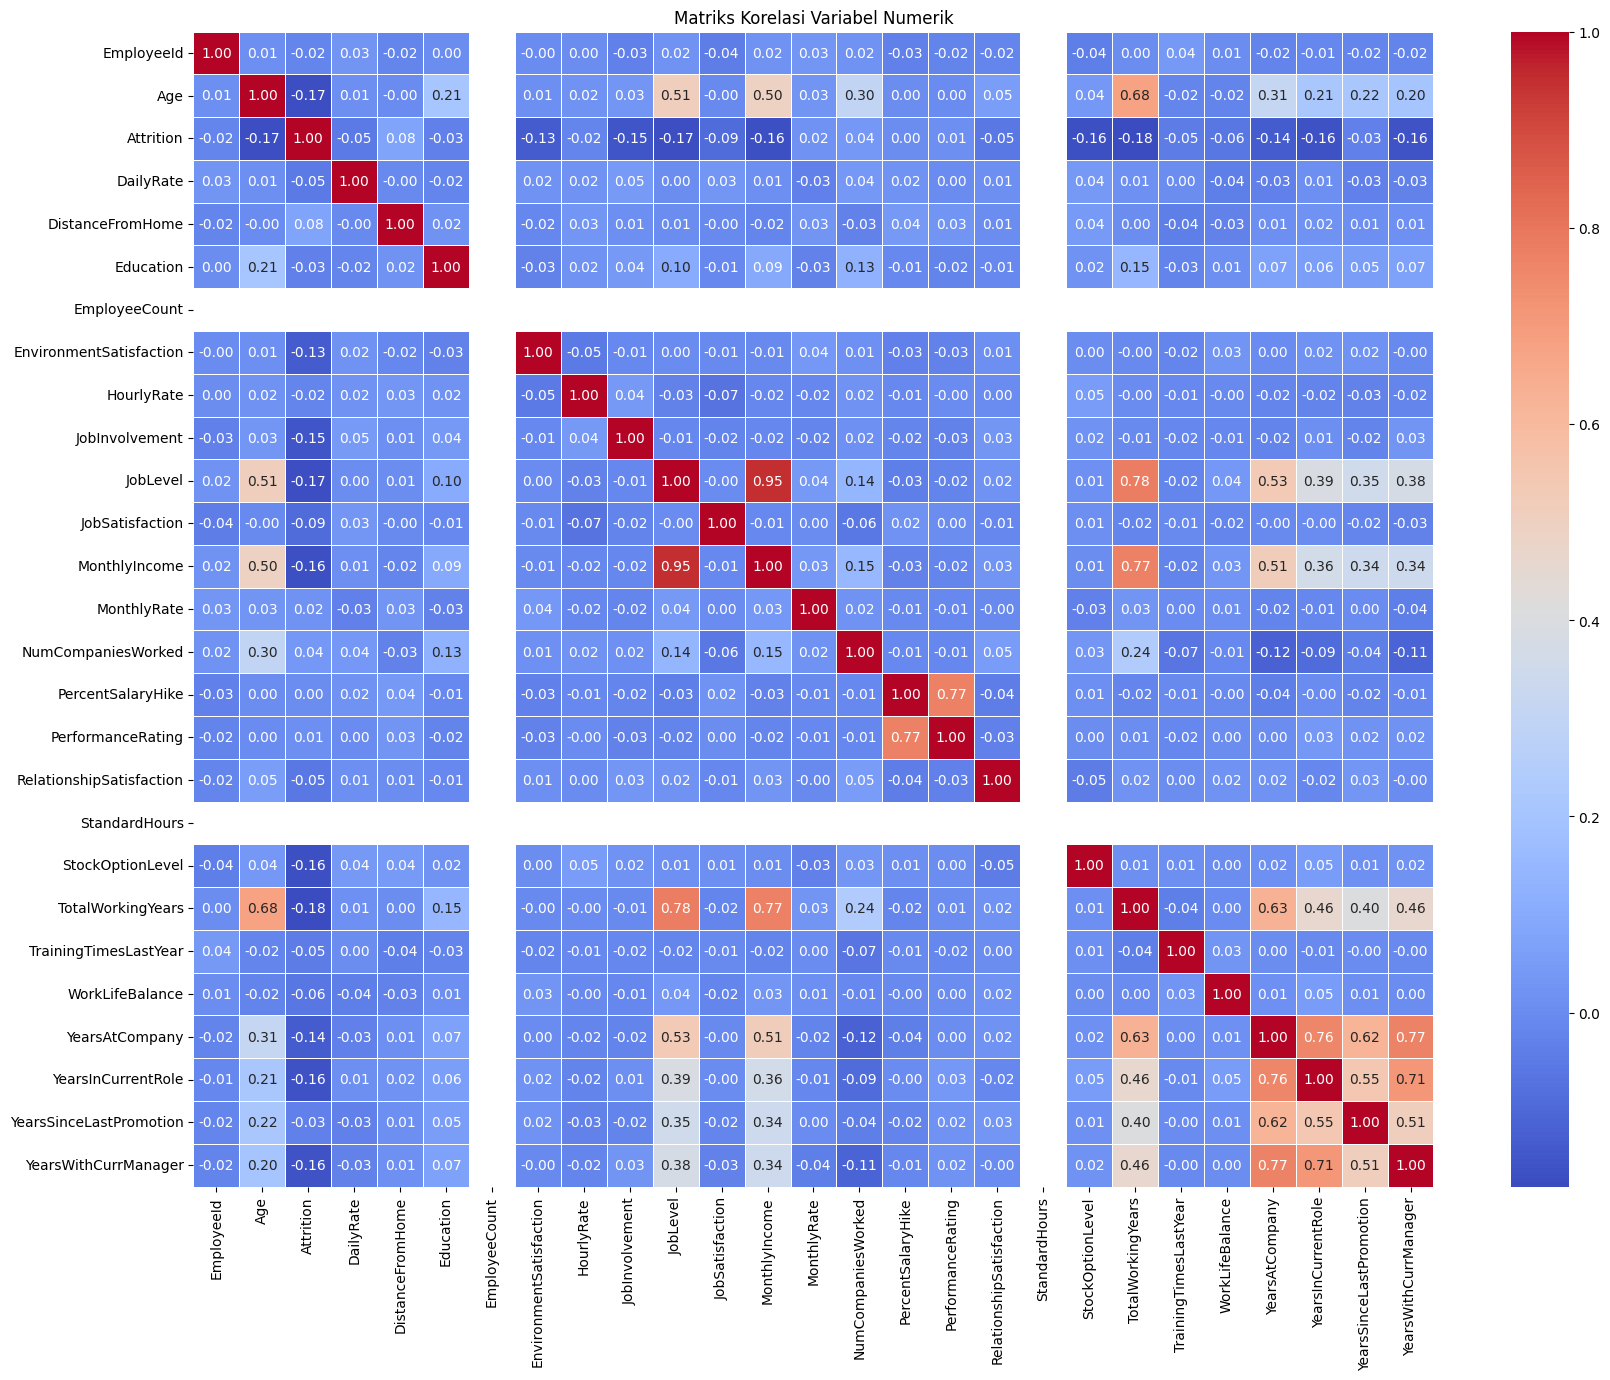

In [12]:
# Menghitung matriks korelasi
correlation_matrix = employee[num_cols].corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

Observasi dari matriks korelasi:
- Terdapat korelasi positif yang kuat antara 'MonthlyIncome' dan 'JobLevel'. Ini masuk akal karena level pekerjaan yang lebih tinggi biasanya diikuti dengan pendapatan yang lebih tinggi.
- 'TotalWorkingYears' memiliki korelasi positif yang kuat dengan 'JobLevel' dan 'MonthlyIncome'.
- 'YearsAtCompany' berkorelasi positif dengan 'YearsInCurrentRole', 'YearsSinceLastPromotion', dan 'YearsWithCurrManager'.
- Korelasi antara 'PerformanceRating' dan 'PercentSalaryHike' terlihat, meskipun tidak sangat kuat.
- Perhatikan juga korelasi antara variabel-variabel numerik dengan 'Attrition'. Meskipun 'Attrition' adalah biner (0 atau 1), korelasi ini dapat memberikan indikasi awal. Misalnya, 'MonthlyIncome' memiliki korelasi negatif dengan 'Attrition', yang mendukung temuan dari boxplot sebelumnya.

### Ringkasan Temuan dari Data Understanding
Berdasarkan analisis yang telah dilakukan, beberapa poin penting yang dapat disimpulkan adalah:
1.  **Target Variabel**: Terdapat ketidakseimbangan kelas pada variabel 'Attrition', dimana jumlah karyawan yang tidak attrition lebih dominan.
2.  **Nilai Kosong**: Hanya kolom 'Attrition' yang memiliki nilai kosong dan baris tersebut telah dieliminasi untuk analisis data berlabel, menghasilkan dataset 'employee_labeled'.
3.  **Data Duplikat**: Tidak ditemukan data duplikat pada dataset yang sudah dibersihkan dari NaN di 'Attrition'.
4.  **Kolom Konstanta**: Kolom 'EmployeeCount', 'Over18', dan 'StandardHours' adalah kolom konstanta yang tidak memberikan variasi dan dapat dipertimbangkan untuk dihapus pada tahap pre-processing.
5.  **Distribusi Variabel Numerik**:
    - Usia (Age) mayoritas produktif.
    - Pendapatan bulanan (MonthlyIncome) sangat miring ke kanan, dengan beberapa nilai tinggi.
    - Jarak dari rumah (DistanceFromHome) juga miring ke kanan.
    - Variabel terkait lama bekerja (YearsAtCompany, TotalWorkingYears, dll.) juga menunjukkan kemiringan ke kanan.
6.  **Distribusi Variabel Kategorikal**:
    - Mayoritas karyawan jarang melakukan perjalanan bisnis (BusinessTravel).
    - Departemen R&D dan Sales mendominasi.
    - Lebih banyak karyawan yang tidak lembur (OverTime).
7.  **Hubungan dengan Attrition (Awal)**:
    - Karyawan dengan pendapatan bulanan lebih rendah, yang bekerja lembur, dan memiliki kepuasan kerja rendah cenderung memiliki tingkat attrition lebih tinggi.
8.  **Korelasi**: Terdapat korelasi yang diharapkan antar variabel numerik seperti 'MonthlyIncome' dengan 'JobLevel', serta 'TotalWorkingYears' dengan 'MonthlyIncome'.

## Data Preparation / Preprocessing

Setelah memahami data, tahap selanjutnya adalah mempersiapkan data agar siap digunakan untuk pemodelan.
Langkah-langkah yang akan dilakukan meliputi:
1. Membersihkan dataset dari missing values dan duplikat.
2. Menghapus kolom yang tidak diperlukan.
3. Melakukan encoding pada variabel kategorikal.
4. Melakukan penskalaan pada variabel numerik.
5. Memisahkan fitur (X) dan target (y).
6. Membagi dataset menjadi data latih (train) dan data uji (test).

### 1. Membersihkan dataset dari missing values dan duplikat.

In [24]:
# Menghitung jumlah nilai kosong per kolom
missing_values = employee.isnull().sum()
missing_values = missing_values[missing_values > 0] # Hanya tampilkan kolom yang ada nilai kosong
print("Jumlah nilai kosong per kolom:")
print(missing_values)
print("\n")

# Menghitung persentase nilai kosong per kolom
missing_percentage = (employee.isnull().sum() / len(employee)) * 100
missing_percentage = missing_percentage[missing_percentage > 0] # Hanya tampilkan kolom yang ada nilai kosong
print("Persentase nilai kosong per kolom:")
print(missing_percentage)

Jumlah nilai kosong per kolom:
Attrition    412
dtype: int64


Persentase nilai kosong per kolom:
Attrition    28.027211
dtype: float64


Dari output di atas, terlihat bahwa kolom 'Attrition' memiliki sejumlah nilai kosong. Baris dengan 'Attrition' kosong tidak dapat digunakan untuk melatih model karena kolom 'Attrition' merupakan target variabel sehingga kita akan menghapusnya.

In [25]:
# Menghapus baris dimana 'Attrition' adalah NaN
employee_labeled = employee.dropna(subset=['Attrition']).reset_index(drop=True).copy() # Menggunakan .copy() untuk menghindari SettingWithCopyWarning
print(f"Dimensi data sebelum menghapus NaN di Attrition: {employee.shape}")
print(f"Dimensi data setelah menghapus NaN di Attrition: {employee_labeled.shape}")

# Cek kembali missing values di data yang sudah dilabeli
print("\nMissing values di employee_labeled:")
print(employee_labeled.isnull().sum()[employee_labeled.isnull().sum() > 0])

Dimensi data sebelum menghapus NaN di Attrition: (1470, 35)
Dimensi data setelah menghapus NaN di Attrition: (1058, 35)

Missing values di employee_labeled:
Series([], dtype: int64)


Setelah menghapus baris dengan nilai 'Attrition' yang kosong, dataset 'employee_labeled' kini bebas dari nilai kosong pada kolom target. Kita akan menggunakan 'employee_labeled' untuk tahapan berikutnya.

In [26]:
duplicate_rows = employee_labeled.duplicated().sum()
print(f"Jumlah baris data duplikat: {duplicate_rows}")

Jumlah baris data duplikat: 0


Dataset employee_labeled tidak memiliki baris data yang terduplikasi.

### 2. Menghapus kolom yang tidak diperlukan

In [27]:
# Kolom konstanta yang sudah diidentifikasi sebelumnya dan kolom ID
cols_to_drop = ['EmployeeId', 'EmployeeCount', 'Over18', 'StandardHours']
employee_labeled.drop(columns=cols_to_drop, inplace=True, errors='ignore') # errors='ignore' jika ada kolom yg sudah dihapus

print("Dimensi data setelah drop kolom tidak penting:", employee_labeled.shape)
employee_labeled.head(2)

Dimensi data setelah drop kolom tidak penting: (1058, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,No,15,3,1,0,15,2,1,1,0,0,0
1,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Yes,12,3,3,3,18,2,4,10,0,2,7


### 3. Encoding Variabel Kategorikal

Model machine learning memerlukan input numerik. Oleh karena itu, variabel kategorikal perlu diubah menjadi numerik.  

Strategi encoding:
- Untuk 'BusinessTravel' yang memiliki urutan (Non-Travel < Travel_Rarely < Travel_Frequently), kita gunakan Ordinal Encoding.
- Untuk 'Gender' dan 'OverTime' yang biner, kita bisa mapping manual atau One-Hot Encoding. Kita akan gunakan mapping manual agar lebih sederhana.
- Untuk variabel nominal lainnya, kita gunakan One-Hot Encoding.

In [28]:
# Mapping untuk Gender dan OverTime
employee_labeled['Gender'] = employee_labeled['Gender'].map({'Male': 0, 'Female': 1})
employee_labeled['OverTime'] = employee_labeled['OverTime'].map({'No': 0, 'Yes': 1})

# Ordinal Encoding untuk BusinessTravel
travel_order = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']
ordinal_encoder = OrdinalEncoder(categories=[travel_order])
employee_labeled['BusinessTravel'] = ordinal_encoder.fit_transform(employee_labeled[['BusinessTravel']])

# One-Hot Encoding untuk sisa kolom kategorikal nominal
cat_cols_to_onehot = [col for col in employee_labeled.select_dtypes(include='object').columns.tolist()]

# One-Hot Encoding untuk sisa kolom kategorikal
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(employee_labeled[cat_cols_to_onehot])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols_to_onehot))
employee_labeled = pd.concat([employee_labeled.drop(columns=cat_cols_to_onehot), encoded_df], axis=1)

print("Dimensi data setelah encoding:", employee_labeled.shape)
print("Tipe data setelah encoding:")
print(employee_labeled.info()) # Cek apakah semua sudah numerik
employee_labeled.head(2)

Dimensi data setelah encoding: (1058, 48)
Tipe data setelah encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1058 non-null   int64  
 1   Attrition                          1058 non-null   float64
 2   BusinessTravel                     1058 non-null   float64
 3   DailyRate                          1058 non-null   int64  
 4   DistanceFromHome                   1058 non-null   int64  
 5   Education                          1058 non-null   int64  
 6   EnvironmentSatisfaction            1058 non-null   int64  
 7   Gender                             1058 non-null   int64  
 8   HourlyRate                         1058 non-null   int64  
 9   JobInvolvement                     1058 non-null   int64  
 10  JobLevel                           1058 non-null  

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,37,1.0,1.0,1141,11,2,1,1,61,1,2,2,4777,14382,5,0,15,3,1,0,15,2,1,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,51,1.0,1.0,1323,4,4,1,0,34,3,1,3,2461,10332,9,1,12,3,3,3,18,2,4,10,0,2,7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [37]:
filename = 'onehot_encoder.pkl'
with open(filename, 'wb') as file:
    pickle.dump(encoder, file)
print(f"\nOneHotEncoder telah disimpan ke '{filename}'")


OneHotEncoder telah disimpan ke 'onehot_encoder.pkl'


In [39]:
filename = 'ordinal_encoder.pkl'
with open(filename, 'wb') as file:
    pickle.dump(ordinal_encoder, file)
print(f"\nOrdinalEncoder telah disimpan ke '{filename}'")


OrdinalEncoder telah disimpan ke 'ordinal_encoder.pkl'


### 3. Memisahkan Fitur (X) dan Target (y)

In [29]:
# Pastikan Attrition bertipe integer
employee_labeled['Attrition'] = employee_labeled['Attrition'].astype(int)

X = employee_labeled.drop('Attrition', axis=1)
y = employee_labeled['Attrition']

print("Dimensi Fitur (X):", X.shape)
print("Dimensi Target (y):", y.shape)

Dimensi Fitur (X): (1058, 47)
Dimensi Target (y): (1058,)


### 4. Membagi Dataset menjadi Data Latih dan Data Uji

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y penting karena ada imbalance class

print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test:", y_test.shape)
print("\nProporsi Attrition di y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporsi Attrition di y_test:")
print(y_test.value_counts(normalize=True))

Dimensi X_train: (846, 47)
Dimensi X_test: (212, 47)
Dimensi y_train: (846,)
Dimensi y_test: (212,)

Proporsi Attrition di y_train:
Attrition
0    0.830969
1    0.169031
Name: proportion, dtype: float64

Proporsi Attrition di y_test:
Attrition
0    0.830189
1    0.169811
Name: proportion, dtype: float64


### 5. Penskalaan Variabel Numerik (Feature Scaling)

Penskalaan dilakukan agar variabel numerik memiliki rentang nilai yang seragam, yang dapat meningkatkan performa beberapa model.

Kita akan menggunakan MinMaxScaler yang mengubah fitur ke rentang [0, 1].
Penskalaan dilakukan **setelah** pembagian data train-test untuk mencegah data leakage dari test set ke train set.

In [31]:
# Ambil daftar kolom numerik dari `employee_labeled` sebelum di-dummy, dan pastikan ada di X_train
original_numerical_cols = employee_labeled.select_dtypes(exclude=['object', 'bool']).columns.tolist()
original_numerical_cols.remove('Attrition') # Hapus target

In [47]:
# Tambahkan BusinessTravel yang sudah di-ordinal encode
cols_to_scale = [col for col in original_numerical_cols if col in X_train.columns]
if 'BusinessTravel' not in cols_to_scale and 'BusinessTravel' in X_train.columns:
    cols_to_scale.append('BusinessTravel')

In [33]:
print(f"Kolom yang akan di-scale: {cols_to_scale}")

scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("\nData X_train setelah penskalaan (5 baris pertama):")
X_train.head()

Kolom yang akan di-scale: ['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales 

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
964,0.476190,1.0,0.423049,0.214286,0.50,1.000000,0.0,0.385714,1.000000,0.0,0.666667,0.084308,0.548243,0.111111,0.0,0.000000,0.0,1.000000,1.000000,0.100,0.333333,0.666667,0.100,0.111111,0.000000,0.176471,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
409,0.309524,0.5,0.162491,0.000000,0.25,1.000000,0.0,0.971429,0.333333,0.0,0.000000,0.063665,0.566111,0.111111,0.0,0.071429,0.0,0.666667,0.333333,0.100,0.500000,0.666667,0.100,0.111111,0.200000,0.117647,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
936,0.238095,0.5,0.395132,0.000000,0.25,0.000000,1.0,0.528571,0.000000,0.0,0.333333,0.063560,0.071391,0.777778,1.0,0.142857,0.0,1.000000,0.000000,0.250,0.666667,0.666667,0.175,0.388889,0.200000,0.411765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
974,0.428571,1.0,0.332140,0.607143,0.75,0.666667,0.0,0.728571,1.000000,0.0,1.000000,0.141074,0.201887,0.444444,0.0,0.500000,0.0,1.000000,0.666667,0.100,0.333333,0.666667,0.025,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
255,0.523810,0.5,0.377953,0.107143,0.75,0.666667,0.0,0.528571,0.333333,0.5,1.000000,0.518483,0.259305,0.777778,0.0,0.000000,0.0,0.000000,0.333333,0.375,0.333333,0.333333,0.300,0.611111,0.133333,0.647059,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [45]:
filename = 'scaler.pkl'
with open(filename, 'wb') as file:
    pickle.dump(scaler, file)
print(f"\nMinMaxScaler telah disimpan ke '{filename}'")


MinMaxScaler telah disimpan ke 'scaler.pkl'


## Modeling

Kita akan menggunakan model Logistic Regression sebagai model untuk klasifikasi attrition.

In [34]:
# Inisialisasi dan latih model
log_reg = LogisticRegression(solver='liblinear', random_state=42) # liblinear baik untuk dataset kecil & binary classification
log_reg.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1] # Probabilitas untuk kelas 1 (Attrition)

In [35]:
# Nama file untuk menyimpan model
filename = 'model.pkl'

# Simpan model ke dalam file pickle
with open(filename, 'wb') as file:
    pickle.dump(log_reg, file)

print(f"Model Logistic Regression berhasil disimpan sebagai {filename}")

Model Logistic Regression berhasil disimpan sebagai model.pkl


## Evaluation

Setelah model dilatih, kita perlu mengevaluasi performanya menggunakan berbagai metrik.

Evaluasi Model Logistic Regression:
Accuracy: 0.8821
Precision: 0.7619
Recall (Sensitivity): 0.4444
F1-score: 0.5614
ROC AUC Score: 0.8351

Confusion Matrix:
[[171   5]
 [ 20  16]]


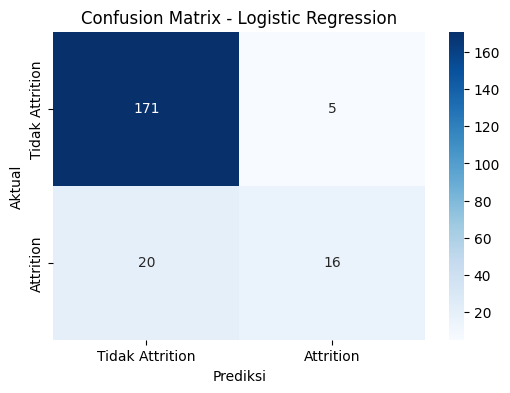


Classification Report:
                     precision    recall  f1-score   support

Tidak Attrition (0)       0.90      0.97      0.93       176
      Attrition (1)       0.76      0.44      0.56        36

           accuracy                           0.88       212
          macro avg       0.83      0.71      0.75       212
       weighted avg       0.87      0.88      0.87       212



In [36]:
print("Evaluasi Model Logistic Regression:")
accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
roc_auc = roc_auc_score(y_test, y_pred_proba_log_reg) # Menggunakan probabilitas untuk ROC AUC

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}") # Seberapa banyak dari yang diprediksi Attrition benar-benar Attrition
print(f"Recall (Sensitivity): {recall:.4f}") # Seberapa banyak dari yang sebenarnya Attrition berhasil diprediksi
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_log_reg)
print(cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Attrition', 'Attrition'], yticklabels=['Tidak Attrition', 'Attrition'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Tidak Attrition (0)', 'Attrition (1)']))

### Interpretasi Hasil Evaluasi
- **Accuracy**: Secara keseluruhan, berapa persen prediksi yang benar. Namun, untuk data imbalanced, akurasi tidak terlalu baik untuk mengukur performa model.
- **Precision (untuk kelas 1 - Attrition)**: Dari semua karyawan yang diprediksi akan attrition, berapa persen yang sebenarnya attrition. Precision tinggi penting jika biaya salah memprediksi karyawan akan attrition (padahal tidak) itu tinggi (misalnya, intervensi yang mahal).
- **Recall (untuk kelas 1 - Attrition)**: Dari semua karyawan yang sebenarnya attrition, berapa persen yang berhasil diidentifikasi oleh model. Recall tinggi penting jika biaya gagal mendeteksi karyawan yang akan attrition itu tinggi (misalnya, kehilangan talenta berharga).
- **F1-score**: Rata-rata harmonik dari precision dan recall. Memberikan keseimbangan antara keduanya.
- **ROC AUC Score**: Mengukur kemampuan model untuk membedakan antara kelas positif dan negatif. Skor mendekati 1 menunjukkan performa yang baik.
- **Confusion Matrix**:
    - True Positives (TP): Karyawan yang attrition dan diprediksi attrition.
    - True Negatives (TN): Karyawan yang tidak attrition dan diprediksi tidak attrition.
    - False Positives (FP) / Type I Error: Karyawan yang tidak attrition tetapi diprediksi attrition.
    - False Negatives (FN) / Type II Error: Karyawan yang attrition tetapi diprediksi tidak attrition.

**Observasi:**  
Model Logistic Regression ini menghasilkan akurasi sekitar 88%. Namun, nilai Recall untuk kelas 'Attrition (1)' rendah yaitu sekitar 44% artinya lebih dari separuh karyawan yang akan pindah tidak terdeteksi oleh model. Hal ini umum terjadi pada dataset dengan kelas yang tidak seimbang. Precision untuk kelas Attrition (0.76) cukup baik. Ini berarti jika model memprediksi seseorang akan attrition, ada kemungkinan 3 dari 4 prediksi tersebut benar. Namun, karena recallnya rendah, model tidak banyak memberikan prediksi "akan attrition" untuk karyawan yang benar-benar akan attrition.

**Langkah Selanjutnya yang Mungkin Dipertimbangkan:**
1.  **Menangani Ketidakseimbangan Kelas**: Menggunakan teknik seperti SMOTE (Synthetic Minority Over-sampling Technique) pada data latih, atau menggunakan class weights pada model.
2.  **Feature Engineering**: Membuat fitur baru atau mentransformasi fitur yang ada untuk meningkatkan performa model.
3.  **Pemilihan Fitur**: Menggunakan teknik seleksi fitur untuk memilih fitur yang paling relevan.
4.  **Mencoba Model Lain**: Eksplorasi model klasifikasi lain seperti Random Forest, Gradient Boosting, atau SVM.
5.  **Hyperparameter Tuning**: Melakukan tuning pada hyperparameter model untuk mendapatkan performa optimal.